# Essai apprentissage - 1 couche - avec 4h
Dataset prep : temporel+ avec 4heure avant avec 4h apres

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda, Reshape, Permute
from keras.layers.convolutional import Convolution1D, Convolution2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,Adadelta,RMSprop
from keras.constraints import max_norm

# Training du CNN sur le patient 1

In [2]:
x,y = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/temporel'+str(1)+'_x.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/temporel'+str(1)+'_y.npy')[:,0]
train_images, train_labels,test_images, test_labels = np.expand_dims(x[:100000],-1),to_categorical(y[:100000]),np.expand_dims(x[100000:],-1),to_categorical(y[100000:])

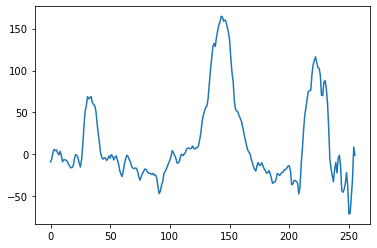

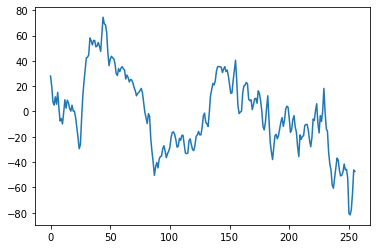

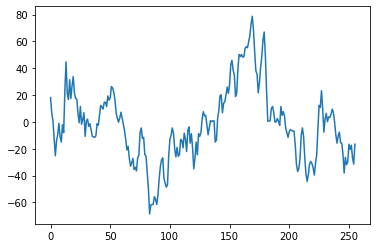

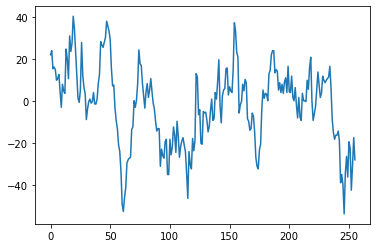

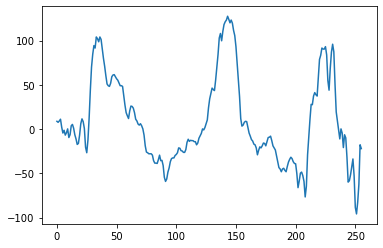

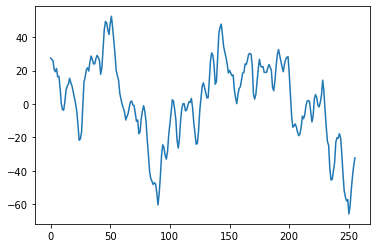

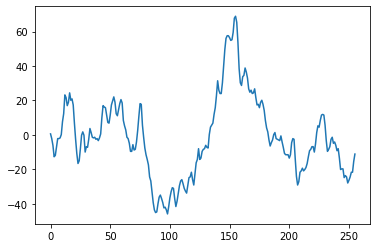

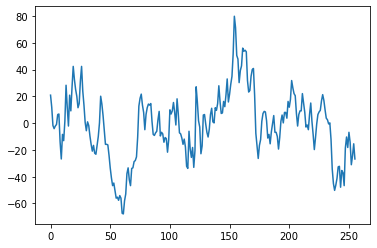

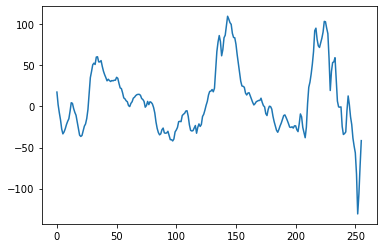

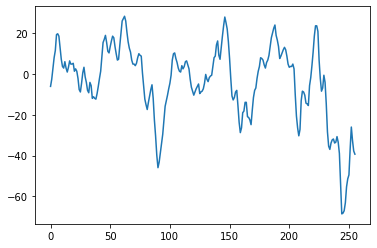

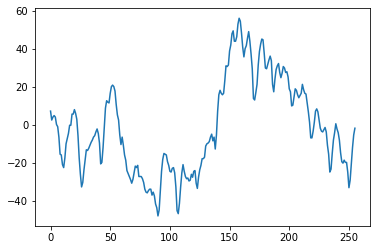

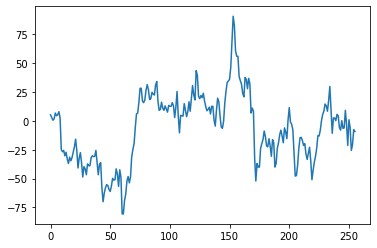

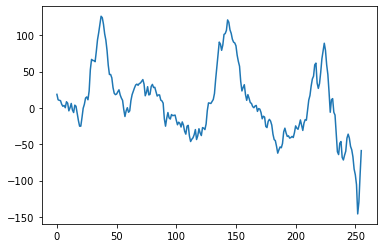

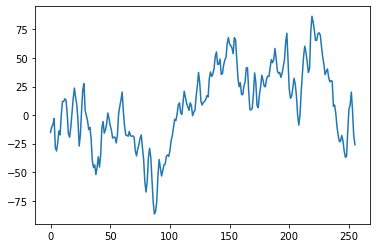

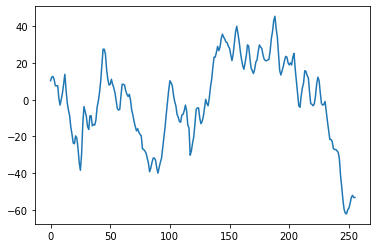

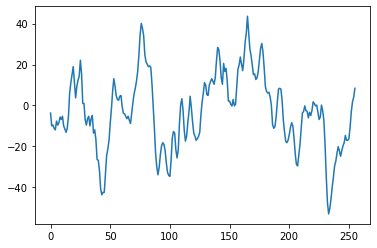

0.0


In [3]:
for i in range(16):
    plt.plot(x[1,:,i])
    plt.show()
print(y[1])

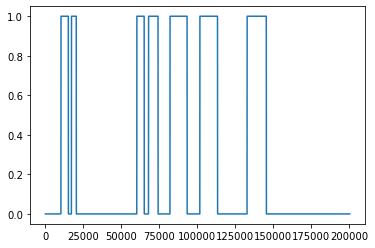

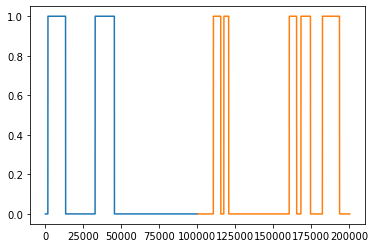

In [4]:
plt.plot(np.arange(0,len(y)),y)
plt.show()
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1])
plt.show()


In [5]:
shuffled_index_train =np.arange(0,len(train_labels))
np.random.shuffle(shuffled_index_train)
train_images, train_labels = train_images[shuffled_index_train,:,:,:],train_labels[shuffled_index_train,:]

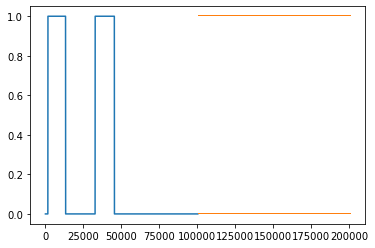

In [6]:
plt.plot(np.arange(0,len(test_labels)),test_labels[:,1])
plt.plot(np.arange(len(test_labels),len(test_labels)+len(train_labels)),train_labels[:,1],',')
plt.show()

In [7]:
train_images.shape

(100000, 256, 16, 1)

In [8]:
model = models.Sequential()

#model.add(layers.Input(train_images.shape[1:]))
model.add(layers.BatchNormalization(axis=1, name='normal1'))
model.add(layers.Convolution2D(2,(16,3),activation = 'relu',padding='valid', strides=(1,2),name='conv1'))
model.add(layers.MaxPooling2D(pool_size=(3,2)))

#model.add(layers.BatchNormalization(axis=1, name='normal2'))
#model.add(layers.Convolution2D(1,(1,2),activation = 'relu',padding='valid', strides=(1,2),name='conv2'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

#model.add(layers.BatchNormalization(axis=1, name='normal3'))
#model.add(layers.Convolution2D(64,(1,3),activation = 'relu',padding='valid', strides=(1,1),name='conv3'))
#model.add(layers.MaxPooling2D(pool_size=(2,1)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))



model.add(layers.Dense(2, activation='softmax',name='dens2'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','AUC'])
model.evaluate(test_images,  test_labels, verbose=2)


2022-07-11 14:44:02.095995: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-11 14:44:03.752470: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9658 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1
2022-07-11 14:44:09.095853: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


3135/3135 - 16s - loss: 39.1618 - accuracy: 0.3572 - auc: 0.3493 - 16s/epoch - 5ms/step


[39.161842346191406, 0.3571912944316864, 0.3493388295173645]

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal1 (BatchNormalization  (None, 256, 16, 1)       1024      
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 241, 7, 2)         98        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 3, 2)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dropout (Dropout)           (None, 480)               0         
                                                                 
 dens2 (Dense)               (None, 2)                 9

In [10]:


history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))


Epoch 1/20
3125/3125 [==============================] - 30s 9ms/step - loss: 0.1445 - accuracy: 0.9461 - auc: 0.9866 - val_loss: 0.4743 - val_accuracy: 0.9588 - val_auc: 0.9863
Epoch 2/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0885 - accuracy: 0.9692 - auc: 0.9943 - val_loss: 0.4158 - val_accuracy: 0.9741 - val_auc: 0.9925
Epoch 3/20
3125/3125 [==============================] - 26s 8ms/step - loss: 0.0781 - accuracy: 0.9723 - auc: 0.9956 - val_loss: 0.3526 - val_accuracy: 0.9827 - val_auc: 0.9953
Epoch 4/20
3125/3125 [==============================] - 27s 8ms/step - loss: 0.0745 - accuracy: 0.9734 - auc: 0.9959 - val_loss: 0.3707 - val_accuracy: 0.9848 - val_auc: 0.9955
Epoch 5/20
3125/3125 [==============================] - 27s 9ms/step - loss: 0.0690 - accuracy: 0.9757 - auc: 0.9965 - val_loss: 0.3613 - val_accuracy: 0.9846 - val_auc: 0.9952
Epoch 6/20
3125/3125 [==============================] - 27s 8ms/step - loss: 0.0682 - accuracy: 0.9755 - auc: 0.996

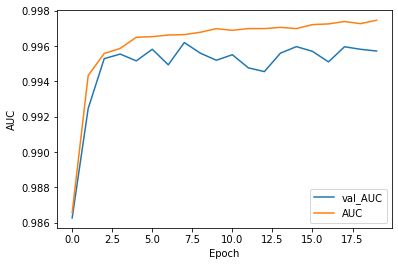

In [11]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

#model.evaluate(test_images,  test_labels, verbose=2)


In [12]:
for i in range(2):
    model.layers[i].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normal1 (BatchNormalization  (None, 256, 16, 1)       1024      
 )                                                               
                                                                 
 conv1 (Conv2D)              (None, 241, 7, 2)         98        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 3, 2)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dropout (Dropout)           (None, 480)               0         
                                                                 
 dens2 (Dense)               (None, 2)                 9

# Transfert du modèle sur le patient 10

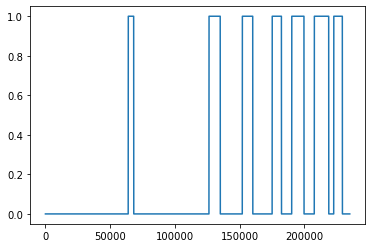

In [13]:
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/temporel'+str(10)+'_x.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/temporel'+str(10)+'_y.npy')[:,0]
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [14]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-11 14:53:38.021818: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3851059200 exceeds 10% of free system memory.
2022-07-11 14:53:40.713718: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3851059200 exceeds 10% of free system memory.


7346/7346 - 28s - loss: 2.7357 - accuracy: 0.4154 - auc: 0.4408 - 28s/epoch - 4ms/step


[2.735679864883423, 0.41544777154922485, 0.4407687783241272]

In [15]:
x2_train, y2_train, x2_test, y2_test = x2[:180000],y2[:180000],x2[180000:],y2[180000:]


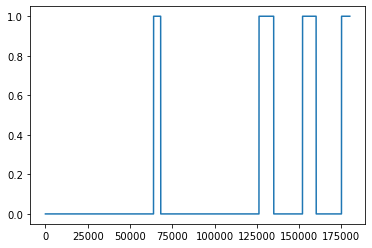

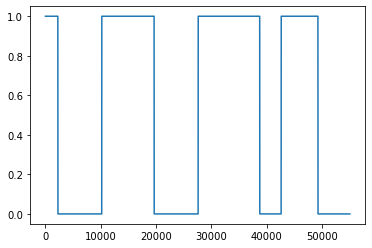

In [16]:
plt.plot(np.arange(0,len(y2_train)),y2_train)
plt.show()
plt.plot(np.arange(0,len(y2_test)),y2_test)
plt.show()


In [17]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

2022-07-11 14:54:14.469905: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2949120000 exceeds 10% of free system memory.
2022-07-11 14:54:16.494919: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2949120000 exceeds 10% of free system memory.


Epoch 1/10
5625/5625 [==============================] - 36s 6ms/step - loss: 0.0484 - accuracy: 0.9875 - auc: 0.9969 - val_loss: 0.2116 - val_accuracy: 0.9283 - val_auc: 0.9780
Epoch 2/10
5625/5625 [==============================] - 34s 6ms/step - loss: 0.0330 - accuracy: 0.9914 - auc: 0.9983 - val_loss: 0.1708 - val_accuracy: 0.9443 - val_auc: 0.9833
Epoch 3/10
5625/5625 [==============================] - 33s 6ms/step - loss: 0.0293 - accuracy: 0.9920 - auc: 0.9985 - val_loss: 0.1736 - val_accuracy: 0.9472 - val_auc: 0.9824
Epoch 4/10
5625/5625 [==============================] - 33s 6ms/step - loss: 0.0273 - accuracy: 0.9925 - auc: 0.9986 - val_loss: 0.2057 - val_accuracy: 0.9393 - val_auc: 0.9794
Epoch 5/10
5625/5625 [==============================] - 33s 6ms/step - loss: 0.0272 - accuracy: 0.9925 - auc: 0.9987 - val_loss: 0.3561 - val_accuracy: 0.9180 - val_auc: 0.9685
Epoch 6/10
5625/5625 [==============================] - 33s 6ms/step - loss: 0.0252 - accuracy: 0.9930 - auc: 0.998

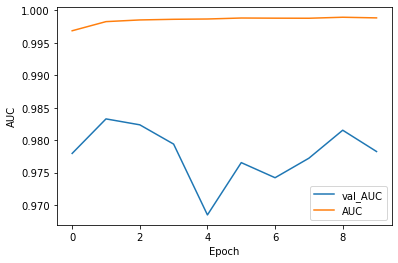

In [18]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')

plt.legend(loc='lower right')

# transfert du modele sur le patient 7

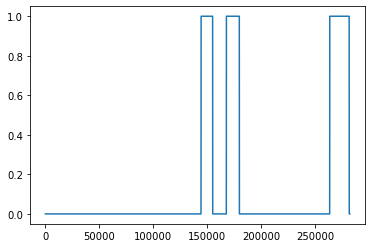

In [19]:
n_patient = 7
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/temporel'+str(n_patient)+'_x.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/temporel'+str(n_patient)+'_y.npy')[:,0]
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [20]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2022-07-11 15:00:09.652440: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4618354688 exceeds 10% of free system memory.
2022-07-11 15:00:22.191166: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.30GiB (rounded to 4618354688)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-11 15:00:22.191278: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-07-11 15:00:22.191333: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 46, Chunks in use: 44. 11.5KiB allocated for chunks. 11.0KiB in use in bin. 328B client-requested in use in bin.
2022-07-11 15:00:22.191364: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 3,

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
x2_train, y2_train, x2_test, y2_test = x2[:153000],y2[:153000],x2[153000:],y2[153000:]


In [ ]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

In [ ]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# Transfert sur patient 22

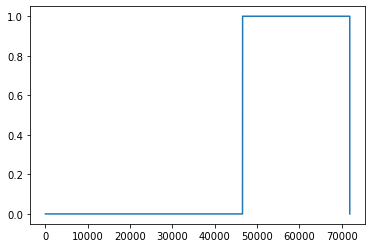

In [22]:
n_patient = 22
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [23]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

2248/2248 - 8s - loss: 0.5672 - accuracy: 0.7969 - auc: 0.9065 - 8s/epoch - 4ms/step


[0.5672091245651245, 0.7968847751617432, 0.9065415859222412]

In [24]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:30000],x2[55000:])),np.concatenate((y2[:30000],y2[55000:])),x2[30000:55000],y2[30000:55000]


In [25]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
1466/1466 [==============================] - 11s 8ms/step - loss: 0.0887 - accuracy: 0.9689 - auc: 0.9942 - val_loss: 0.3222 - val_accuracy: 0.9038 - val_auc: 0.9544
Epoch 2/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0555 - accuracy: 0.9801 - auc: 0.9976 - val_loss: 0.2505 - val_accuracy: 0.9211 - val_auc: 0.9684
Epoch 3/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0496 - accuracy: 0.9820 - auc: 0.9979 - val_loss: 0.2855 - val_accuracy: 0.9151 - val_auc: 0.9629
Epoch 4/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0445 - accuracy: 0.9841 - auc: 0.9983 - val_loss: 0.3615 - val_accuracy: 0.9062 - val_auc: 0.9521
Epoch 5/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0444 - accuracy: 0.9848 - auc: 0.9982 - val_loss: 0.2843 - val_accuracy: 0.9166 - val_auc: 0.9649
Epoch 6/10
1466/1466 [==============================] - 10s 7ms/step - loss: 0.0402 - accuracy: 0.9857 - auc: 0.998

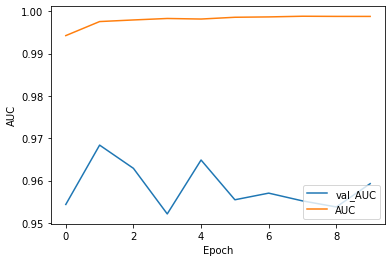

In [26]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')

# transfert sur patient 16

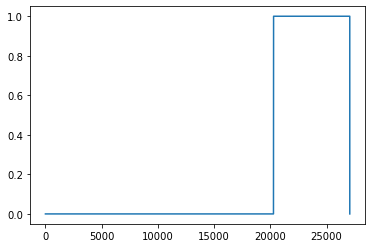

In [27]:
n_patient = 16
x2,y2 = np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_x_4hours.npy'),np.load('/data/thomas/classification epilepsy/chb-mit-scalp-eeg-database-1.0.0/dataset/4hours/temporel'+str(n_patient)+'_y_4hours.npy')
plt.plot(np.arange(0,len(y2)),y2)
plt.show()

In [28]:
model.evaluate(np.expand_dims(x2,-1),  to_categorical(y2), verbose=2)

846/846 - 3s - loss: 4.4133 - accuracy: 0.6618 - auc: 0.7126 - 3s/epoch - 4ms/step


[4.4133405685424805, 0.6618016362190247, 0.7125842571258545]

In [29]:
x2_train, y2_train, x2_test, y2_test = np.concatenate((x2[:15000],x2[22000:])),np.concatenate((y2[:15000],y2[22000:])),x2[15000:22000],y2[15000:22000]


In [30]:
shuffled_index_train =np.arange(0,len(y2_train))
np.random.shuffle(shuffled_index_train)
x2_train,y2_train = x2_train[shuffled_index_train,:,:],y2_train[shuffled_index_train]
x2_train, y2_train, x2_test, y2_test= np.expand_dims(x2_train,-1),to_categorical(y2_train),np.expand_dims(x2_test,-1),to_categorical(y2_test)
history = model.fit(x2_train, y2_train, epochs=10, 
                    validation_data=(x2_test, y2_test))

Epoch 1/10
627/627 [==============================] - 4s 7ms/step - loss: 0.6589 - accuracy: 0.8096 - auc: 0.8698 - val_loss: 1.2899 - val_accuracy: 0.7259 - val_auc: 0.7497
Epoch 2/10
627/627 [==============================] - 4s 7ms/step - loss: 0.3531 - accuracy: 0.8709 - auc: 0.9384 - val_loss: 0.9214 - val_accuracy: 0.7454 - val_auc: 0.7903
Epoch 3/10
627/627 [==============================] - 4s 7ms/step - loss: 0.3206 - accuracy: 0.8835 - auc: 0.9451 - val_loss: 0.7429 - val_accuracy: 0.7416 - val_auc: 0.8265
Epoch 4/10
627/627 [==============================] - 4s 7ms/step - loss: 0.3026 - accuracy: 0.8853 - auc: 0.9493 - val_loss: 0.7149 - val_accuracy: 0.7503 - val_auc: 0.8310
Epoch 5/10
627/627 [==============================] - 4s 7ms/step - loss: 0.2944 - accuracy: 0.8909 - auc: 0.9512 - val_loss: 0.7513 - val_accuracy: 0.7500 - val_auc: 0.8252
Epoch 6/10
627/627 [==============================] - 4s 7ms/step - loss: 0.2967 - accuracy: 0.8922 - auc: 0.9515 - val_loss: 0.79

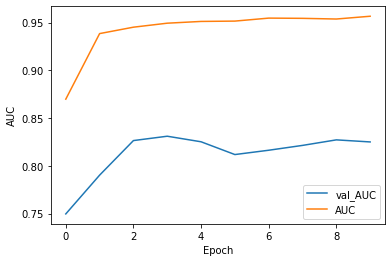

In [31]:
plt.plot(history.history['val_auc'], label = 'val_AUC')
plt.plot(history.history['auc'], label = 'AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(loc='lower right')